In [35]:
#The below results show  that high dropout percentages in the 67-69% give the best validation accuracy.
#A more moderate 9% dropout rate is performing well but 8 and 10% do not show good results so this could just be a result of random weight initialization

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np
import seaborn as sns

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [16]:
df = df.rename(columns={'modelconf.layersconf.Dropout.rate':'DropoutRate'})
df.DropoutRate = df.DropoutRate.astype('float64')
df.epoch = df.epoch.astype('uint8')

In [17]:
desc = df[df.epoch > 6].groupby(['DropoutRate']).describe()
val_acc = desc['Validation Accuracy'].reset_index().sort_values('50%', ascending=False)
train_acc = desc['Train Accuracy'].reset_index().sort_values('50%', ascending=False)

In [18]:
val_acc[val_acc['50%'] > 0.65]

,DropoutRate,count,mean,std,min,25%,50%,75%,max
68,0.67,20.0,0.710781,0.062194,0.528944,0.700796,0.734986,0.746111,0.764472
69,0.68,20.0,0.691245,0.085246,0.534009,0.689761,0.716715,0.746653,0.793415
45,0.45,20.0,0.668325,0.095016,0.534009,0.576881,0.711107,0.753437,0.770984
9,0.09,20.0,0.685474,0.087299,0.534009,0.652768,0.710203,0.747467,0.789436
72,0.69,20.0,0.657001,0.115009,0.534009,0.534009,0.702605,0.759407,0.855644
32,0.32,20.0,0.694645,0.090734,0.534009,0.629070,0.698263,0.790702,0.818379
6,0.06,20.0,0.685926,0.067504,0.490955,0.646889,0.696635,0.741769,0.763025
57,0.57,20.0,0.648951,0.099709,0.534009,0.534009,0.694465,0.723589,0.797757
20,0.20,20.0,0.668958,0.091213,0.534009,0.604559,0.684696,0.745206,0.787627
76,0.73,20.0,0.661216,0.097600,0.534009,0.569374,0.682525,0.762391,0.773517


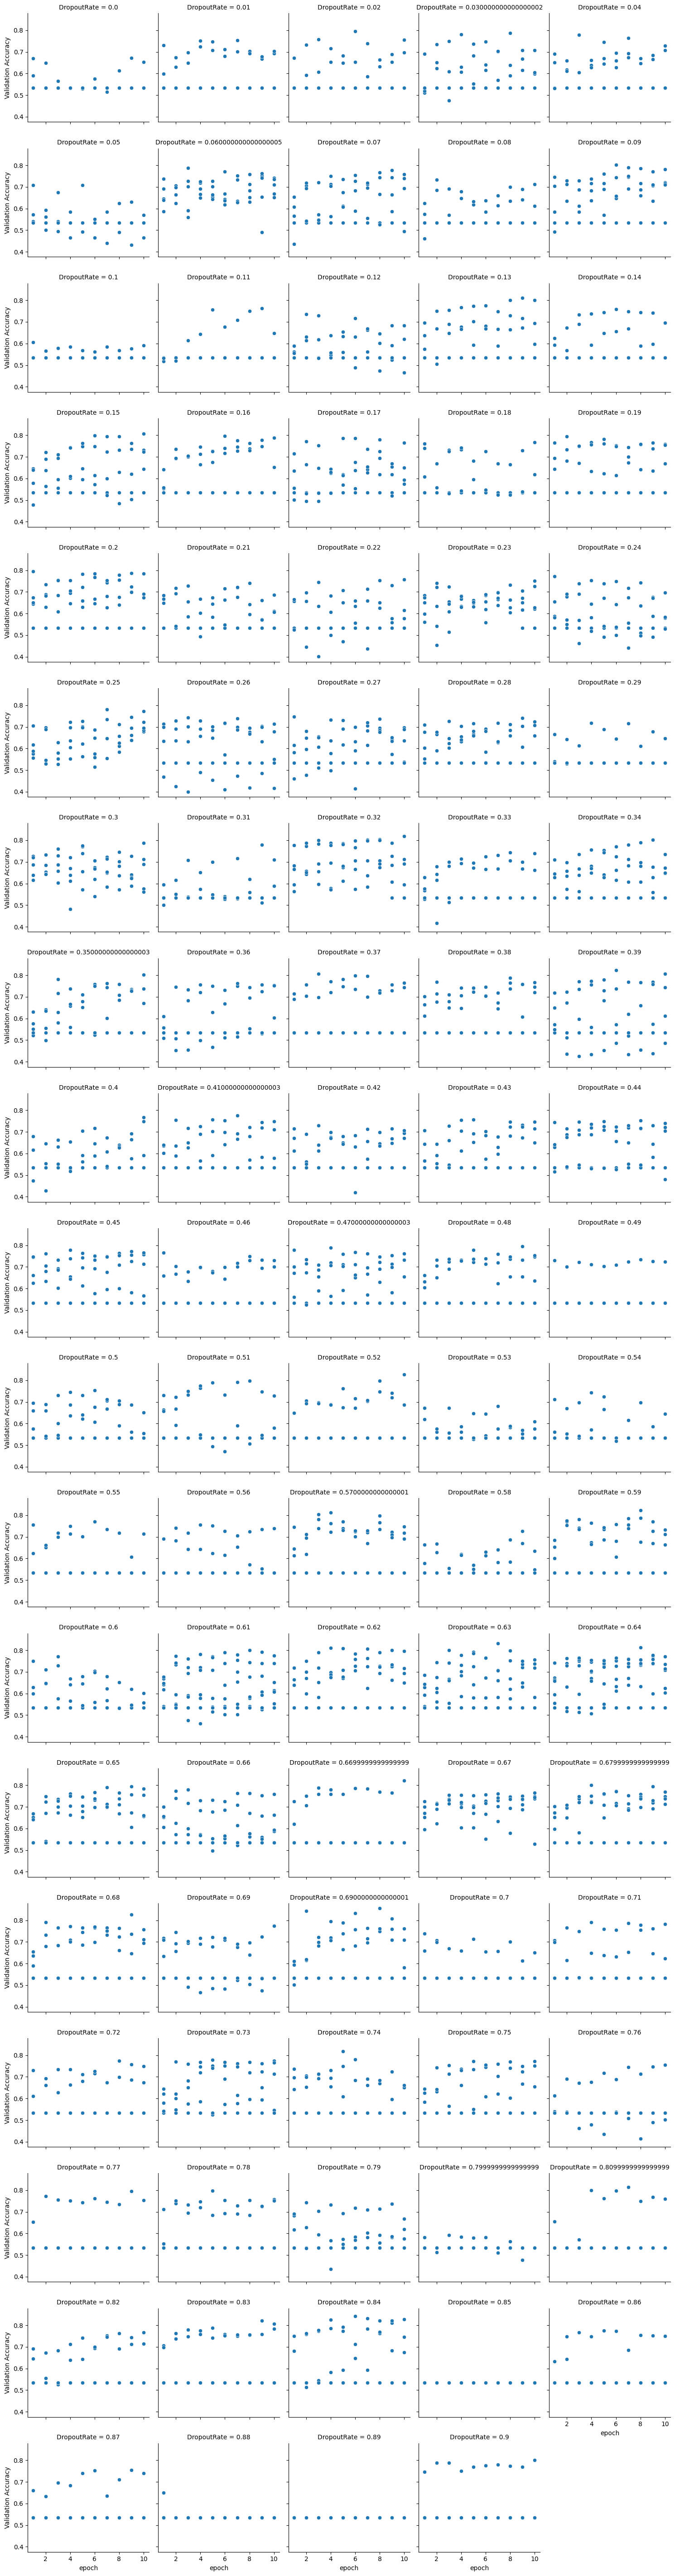

In [19]:
g = sns.FacetGrid(df, col = 'DropoutRate', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Validation Accuracy')
plt.tight_layout()